<a href="https://colab.research.google.com/github/Goldenseek/CSE416A-Final-Project/blob/master/US_Aviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
flights=pd.read_csv("./drive//My Drive/flights-and-airports-data/flights.csv")
airports=pd.read_csv("./drive//My Drive/flights-and-airports-data/airports.csv")

In [0]:
cleanFlights=flights[["Carrier",'OriginAirportID','DestAirportID']]
carriers=list(set(flights['Carrier']))

In [0]:
networks=[]
for carrier in carriers:
  temp=cleanFlights.loc[cleanFlights['Carrier'] == carrier]
  tempG=nx.from_pandas_edgelist(temp,'OriginAirportID','DestAirportID')
  tempG = tempG.subgraph(max(nx.connected_components(tempG), key=len))
  networks.append(tempG)
wholeGraph=nx.from_pandas_edgelist(cleanFlights,'OriginAirportID','DestAirportID','Carrier')

In [0]:
for g in range(len(networks)):
  st=carriers[g]+'.gexf'
  nx.write_gexf(networks[g],st)

In [0]:
data=pd.DataFrame()

In [0]:
temp=[]
for i in range(len(carriers)):
  try:
    temp.append(nx.diameter(networks[i]))
  except:
    temp.append(0)
data['Diameter']=temp

In [0]:
temp=[]
for i in range(len(carriers)):
  try:
    temp.append(nx.average_clustering(networks[i]))
  except:
    temp.append(0)
data['Avg Clustering']=temp


In [0]:
temp=[]
for i in range(len(carriers)):
  try:
    temp.append(nx.average_shortest_path_length(networks[i]))
  except:
    temp.append(0)
data['Avg Shortest Path']=temp


In [0]:
# modularities=[0.160,0.162,0.094,0.142,0.175,0.286,0.116,0.170,0.186,0.196,0.304,0.288,0.098,0.170,0.280]
# data['Modularity']=modularities

In [12]:
data

,Diameter,Avg Clustering,Avg Shortest Path
0,2,0.343124,1.794872
1,6,0.027302,2.428571
2,4,0.570206,2.107539
3,3,0.710984,1.831373
4,4,0.587964,2.026361
5,3,0.260833,1.912656
6,3,0.620807,2.038914
7,3,0.552006,1.877778
8,3,0.719387,1.942493
9,4,0.187778,2.080769


In [13]:
for i in range(len(carriers)):
  d = nx.diameter(networks[i])
  c = nx.average_clustering(networks[i])
  l = nx.average_shortest_path_length(networks[i])
  print(str(carriers[i]) + ":", "D = " + str(d) + ",", "c = " + str(round(c,3)) + ",", "l = " + str(round(l,3)))

HA: D = 2, c = 0.343, l = 1.795
MQ: D = 6, c = 0.027, l = 2.429
OO: D = 4, c = 0.57, l = 2.108
EV: D = 3, c = 0.711, l = 1.831
9E: D = 4, c = 0.588, l = 2.026
AS: D = 3, c = 0.261, l = 1.913
US: D = 3, c = 0.621, l = 2.039
FL: D = 3, c = 0.552, l = 1.878
DL: D = 3, c = 0.719, l = 1.942
F9: D = 4, c = 0.188, l = 2.081
UA: D = 3, c = 0.834, l = 1.893
VX: D = 3, c = 0.644, l = 1.842
WN: D = 3, c = 0.695, l = 1.766
B6: D = 4, c = 0.597, l = 2.019
AA: D = 2, c = 0.667, l = 1.917
YV: D = 4, c = 0.461, l = 2.3


<Figure size 432x288 with 0 Axes>

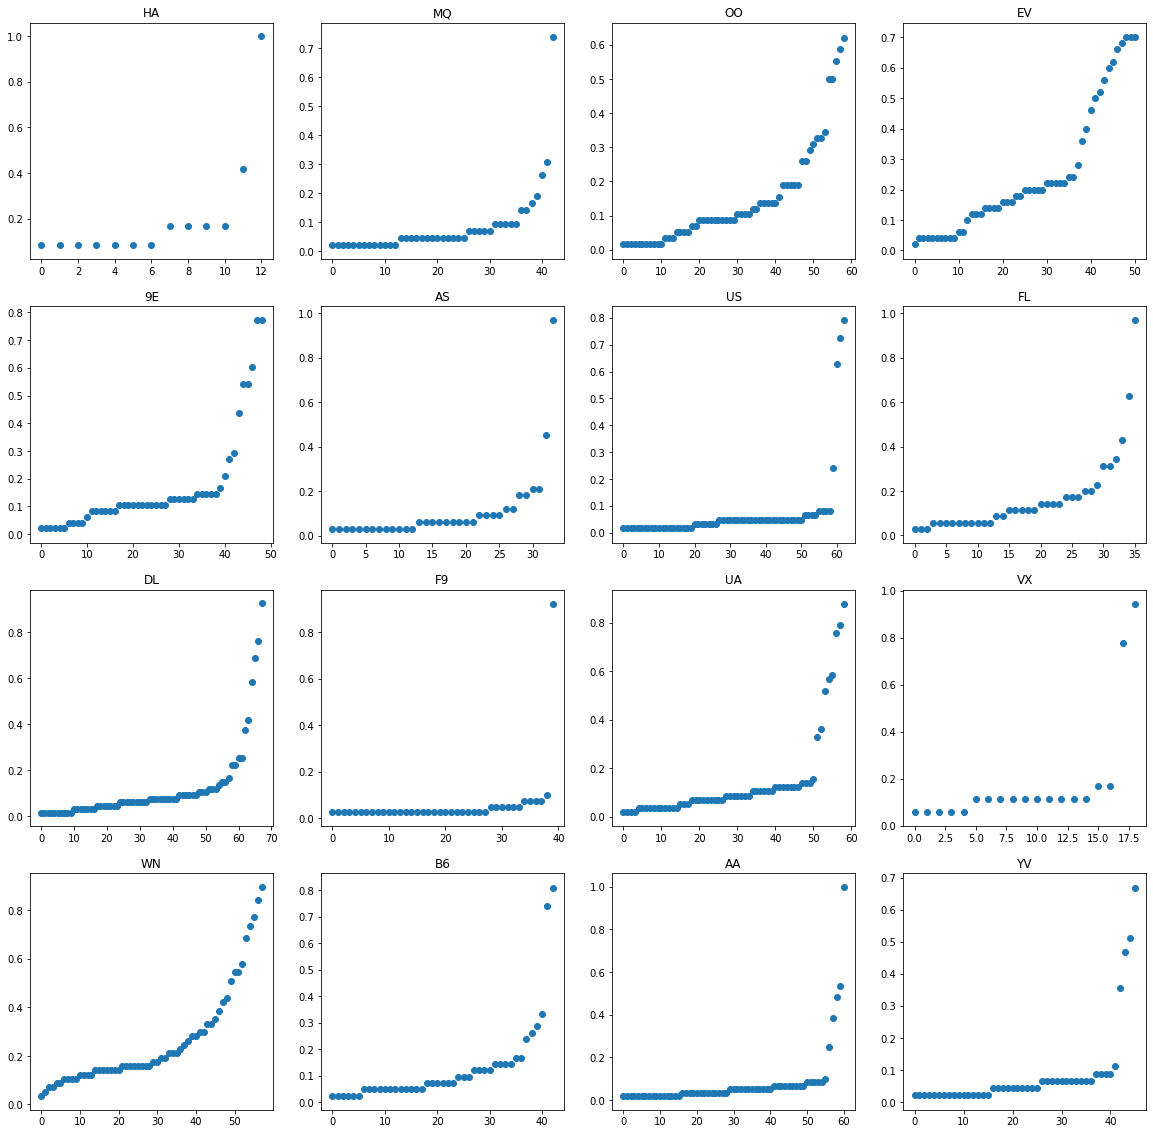

In [14]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig = plt.figure(figsize=(20, 20))
for i in range(0,len(networks)):
    ax = fig.add_subplot(4, 4, i+1)
    t=sorted(nx.degree_centrality(networks[i]).values())
    plt.scatter(range(0,len(t)),t)
    plt.title(carriers[i])

Text(0.5, 1.0, 'All Airlines')

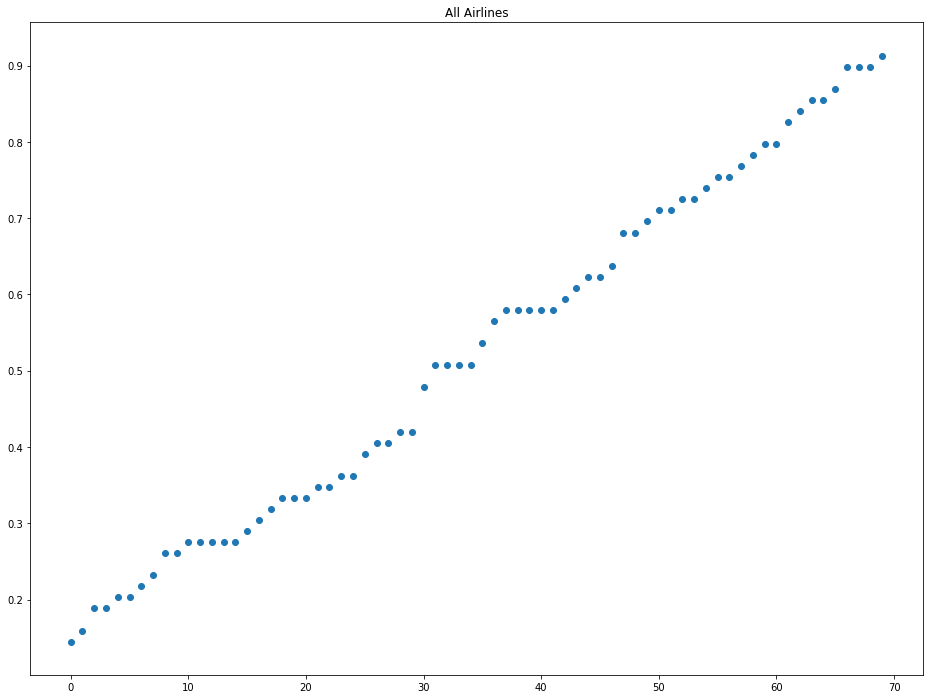

In [15]:
fig = plt.figure(figsize=(16, 12))
t=sorted(nx.degree_centrality(wholeGraph).values())
plt.scatter(range(0,len(t)),t)
plt.title("All Airlines")

In [0]:
import operator
x=(nx.betweenness_centrality(wholeGraph))
t=sorted(x.items(), key=operator.itemgetter(1))

In [0]:
ranking=[]
for i in t:
  ranking.append(list(airports.loc[airports['airport_id']==i[0]]['name']))

In [0]:
importantAirport={}
pt=[]
for i in range(len(networks)):
  x=(nx.betweenness_centrality(networks[i]))
  t=sorted(x.items(), key=operator.itemgetter(1))[-1]
  importantAirport[carriers[i]]=(list(airports.loc[airports['airport_id']==t[0]]['name']),t[1])
  pt.append(t[1])


In [19]:
importantAirport

{'9E': (['Minneapolis-St Paul International'], 0.22958926838476118),
 'AA': (['Dallas/Fort Worth International'], 0.7223352165725048),
 'AS': (['Seattle/Tacoma International'], 0.8268623737373737),
 'B6': (['Logan International'], 0.4574739309627963),
 'DL': (['Hartsfield-Jackson Atlanta International'], 0.4002194931808228),
 'EV': (['George Bush Intercontinental/Houston'], 0.18143004527117118),
 'F9': (['Denver International'], 0.9790823211875843),
 'FL': (['Hartsfield-Jackson Atlanta International'], 0.6057218038730644),
 'HA': (['Honolulu International'], 0.8939393939393939),
 'MQ': (["Chicago O'Hare International"], 0.7435429869987417),
 'OO': (['Denver International'], 0.20229142438187195),
 'UA': (["Chicago O'Hare International"], 0.32401837928153715),
 'US': (['Phoenix Sky Harbor International'], 0.46104353957341776),
 'VX': (['San Francisco International'], 0.6176470588235294),
 'WN': (['Chicago Midway International'], 0.17001217190063964),
 'YV': (['Charlotte Douglas Internati

In [20]:
for i in range(len(networks)):
  print()
  print(carriers[i],len(networks[i].nodes()))


HA 13

MQ 43

OO 59

EV 51

9E 49

AS 34

US 63

FL 36

DL 68

F9 40

UA 59

VX 19

WN 58

B6 43

AA 61

YV 46


In [21]:
for i in range(len(networks)):
  print()
  print(carriers[i],len(networks[i].edges()))


HA 16

MQ 78

OO 256

EV 317

9E 194

AS 62

US 145

FL 107

DL 281

F9 46

UA 251

VX 31

WN 433

B6 115

AA 152

YV 90


Text(0.5, 0, 'Degree')

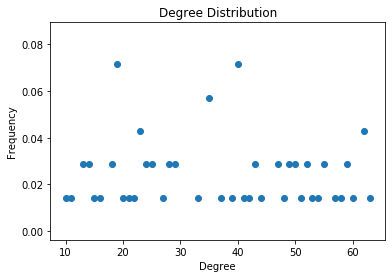

In [22]:
import collections
degree_sequence = sorted([d for n, d in wholeGraph.degree()]) # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cnt = [f/sum(cnt) for f in cnt]

fig, ax = plt.subplots()
plt.scatter(deg,cnt)

plt.title("Degree Distribution")
plt.ylabel("Frequency")
plt.xlabel("Degree")

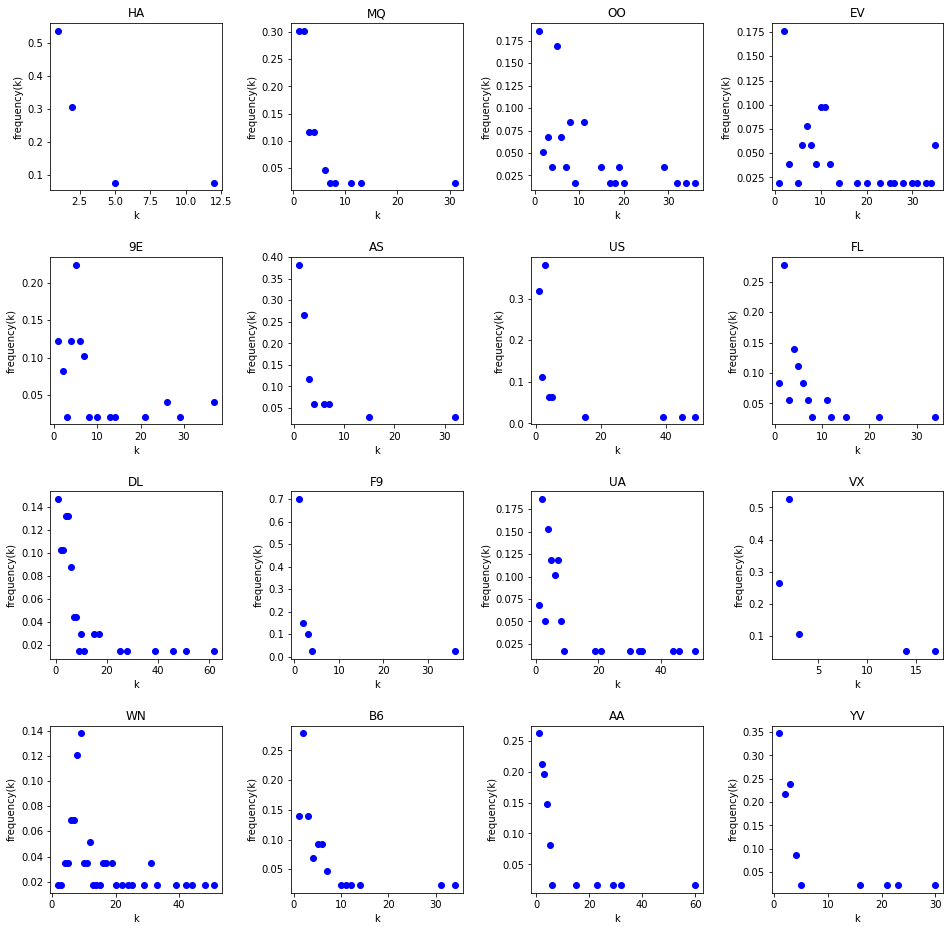

In [23]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
c = 0
for g in networks:
  degree_sequence = sorted([d for n, d in g.degree()]) # degree sequence
  degreeCount = collections.Counter(degree_sequence)
  deg, frq = zip(*degreeCount.items())
  frq = [f/sum(frq) for f in frq]
  ax = fig.add_subplot(4,4,c+1)
  plt.title(carriers[c])
  plt.xlabel("k")
  plt.ylabel("frequency(k)")
  plt.plot(deg, frq, 'bo')
  c += 1

In [0]:
airlines = {
  '9E': 'Endeavor',
  'AA': 'American',
  'AS': 'Alaska',
  'B6': 'JetBlue',
  'DL': 'Delta',
  'EV': 'ExpressJet',
  'F9': 'Frontier',
  'FL': 'AirTran',
  'HA': 'Hawaiian',
  'MQ': 'Envoy',
  'OO': 'SkyWest',
  'UA': 'United',
  'US': 'US Airways',
  'VX': 'Virgin America',
  'WN': 'Southwest',
  'YV': 'Mesa'
}

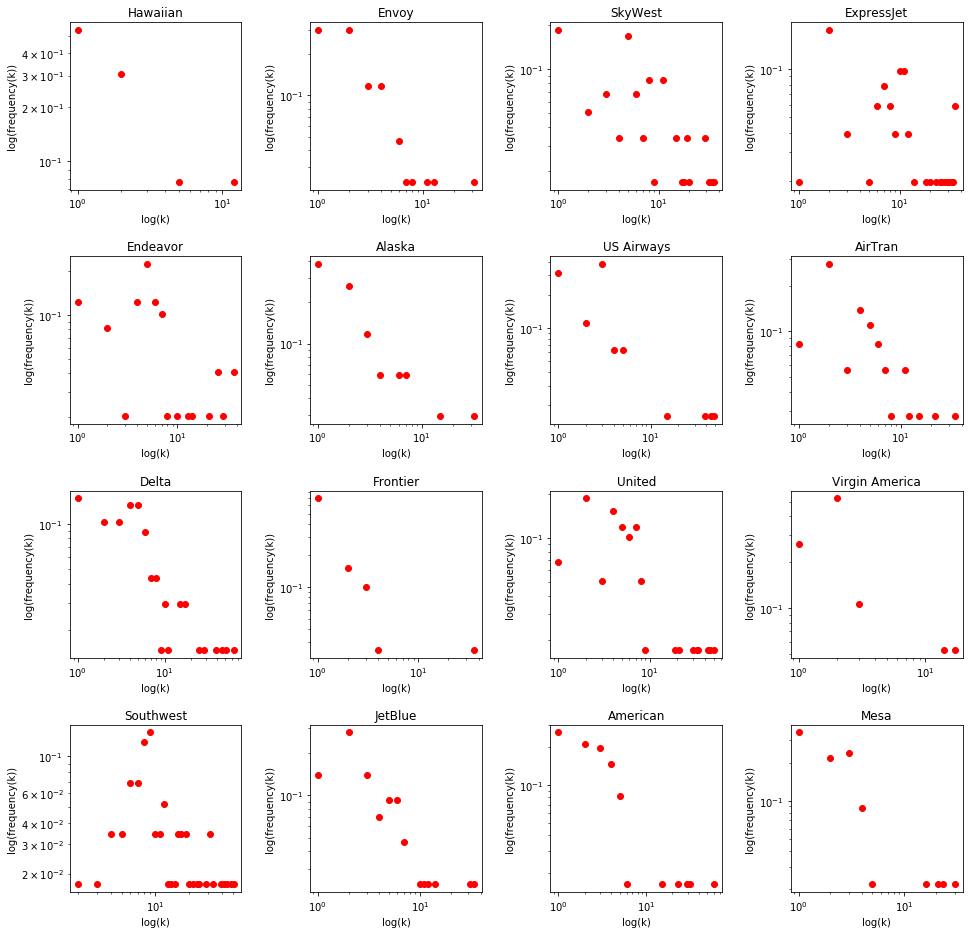

In [25]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(networks)):
  airline = networks[i]
  airline_degree_sequence = sorted([d for n, d in airline.degree()])
  airlineDegreeCount = collections.Counter(airline_degree_sequence)
  airlineDeg, airlineFrq = zip(*airlineDegreeCount.items())
  airlineFrq = [f/sum(airlineFrq) for f in airlineFrq]
  ax = fig.add_subplot(4,4,i+1)
  plt.title(airlines[carriers[i]])
  plt.xlabel("log(k)")
  plt.ylabel("log(frequency(k))")
  plt.loglog(airlineDeg, airlineFrq, 'ro')

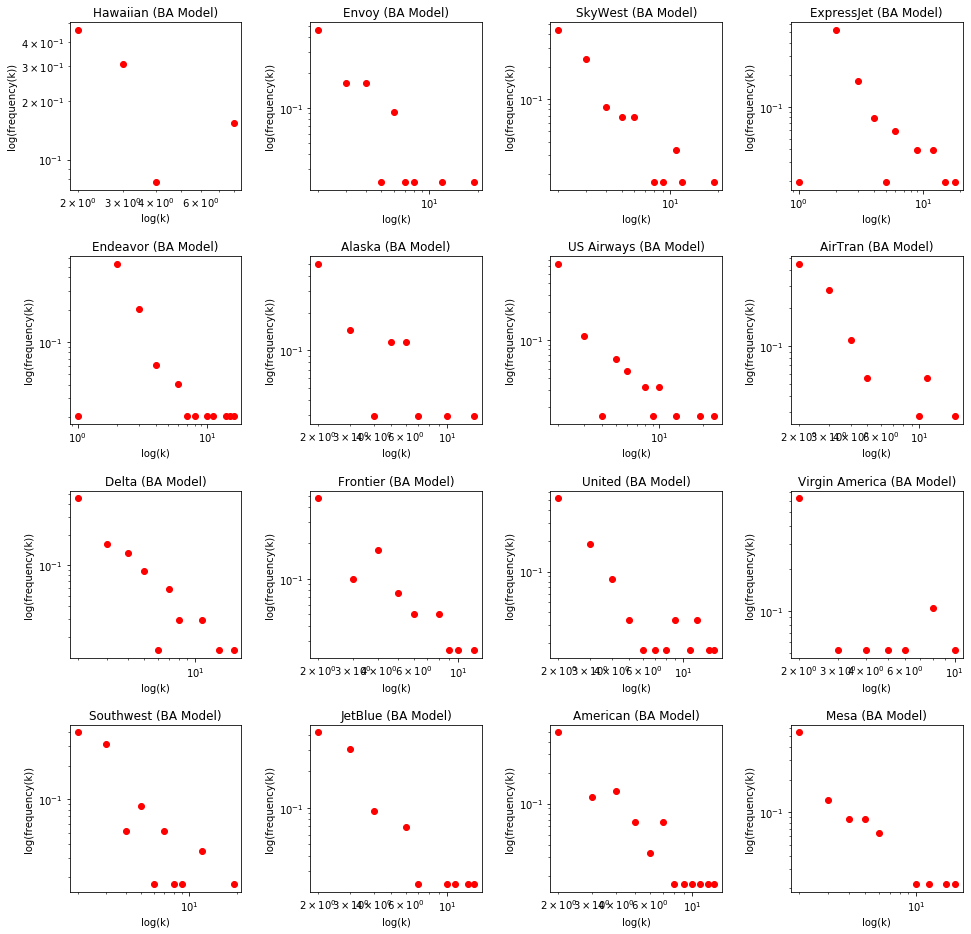

In [26]:
bas = []
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(networks)):
  ba = nx.barabasi_albert_graph(len(networks[i].nodes),2)
  bas.append(ba)
  ba_degree_sequence = sorted([d for n, d in ba.degree()])
  baDegreeCount = collections.Counter(ba_degree_sequence)
  baDeg, baFrq = zip(*baDegreeCount.items())
  baFrq = [f/sum(baFrq) for f in baFrq]
  ax = fig.add_subplot(4,4,i+1)
  plt.title(airlines[carriers[i]] + " (BA Model)")
  plt.xlabel("log(k)")
  plt.ylabel("log(frequency(k))")
  plt.loglog(baDeg, baFrq, 'ro')

In [30]:
for i in range(0,len(networks)):
  a = networks[i]
  ba = bas[i]
  print(airlines[carriers[i]] + ":")
  print(nx.average_clustering(a), nx.average_clustering(ba))
  print(nx.diameter(a), nx.diameter(ba))
  print(nx.average_shortest_path_length(a), nx.average_shortest_path_length(ba))
  print()

Hawaiian:
0.34312354312354315 0.4661172161172161
2 3
1.794871794871795 1.8846153846153846

Envoy:
0.027302280115483413 0.26202142071175116
6 5
2.4285714285714284 2.5802879291251384

SkyWest:
0.5702062322164896 0.17747282947996595
4 5
2.107539450613676 2.760374050263004

ExpressJet:
0.7109843731223813 0.22425523982617407
3 4
1.8313725490196078 2.56

Endeavor:
0.5879636350783431 0.15959998051834787
4 5
2.026360544217687 2.558673469387755

Alaska:
0.26083344628173855 0.19347841700782875
3 4
1.9126559714795008 2.4901960784313726

US Airways:
0.620807359949859 0.23022413095966546
3 5
2.038914490527394 2.6482334869431643

AirTran:
0.5520064086240557 0.24753086419753087
3 4
1.8777777777777778 2.411111111111111

Delta:
0.7193874778681132 0.1493232690031998
3 6
1.9424934152765583 2.9802458296751535

Frontier:
0.18777777777777777 0.09235569985569986
4 5
2.080769230769231 2.612820512820513

United:
0.83412587609388 0.29382453704487604
3 5
1.8930450029222676 2.7679719462302748

Virgin America:
0.6

In [0]:
ws = nx.watts_strogatz_graph(58, 6, 0.25)
southwest = nx.Graph()
for i in range(0,len(networks)):
  if carriers[i] == 'WN':
    southwest = networks[i]

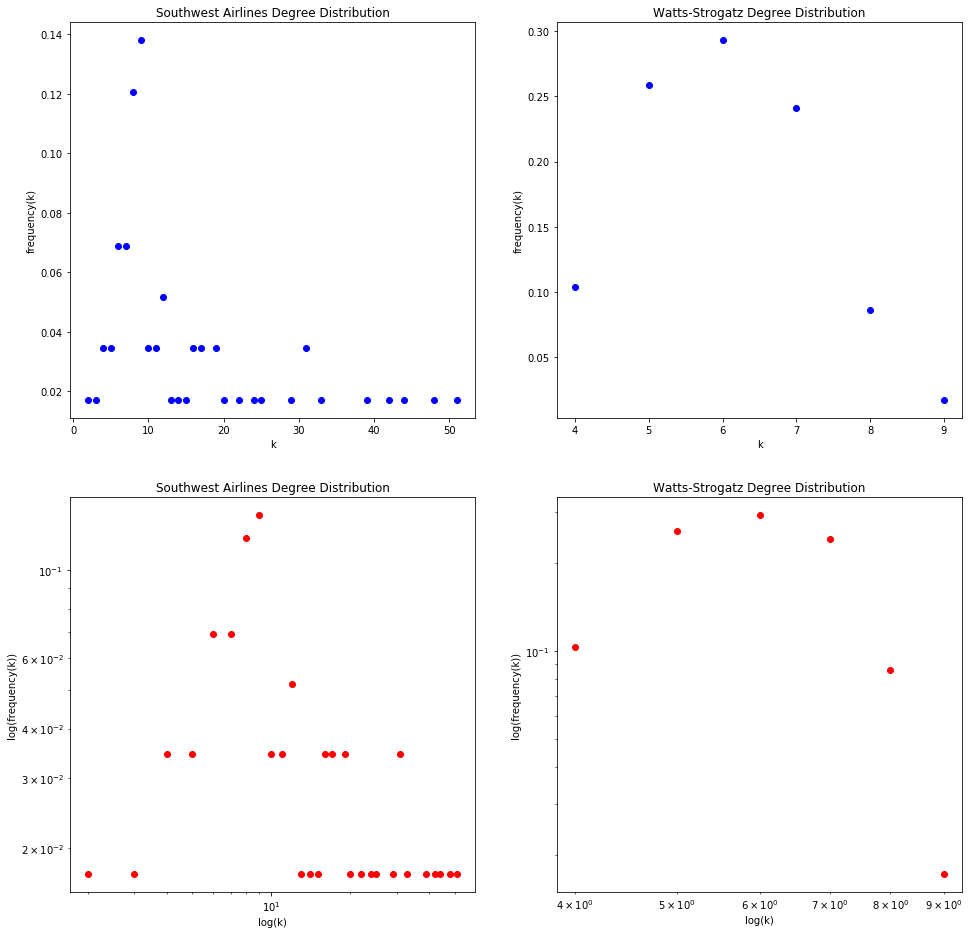

In [32]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
southwest_degree_sequence = sorted([d for n, d in southwest.degree()])
southwestDegreeCount = collections.Counter(southwest_degree_sequence)
southwestDeg, southwestFrq = zip(*southwestDegreeCount.items())
southwestFrq = [f/sum(southwestFrq) for f in southwestFrq]
ws_degree_sequence = sorted([d for n, d in ws.degree()])
wsDegreeCount = collections.Counter(ws_degree_sequence)
wsDeg, wsFrq = zip(*wsDegreeCount.items())
wsFrq = [f/sum(wsFrq) for f in wsFrq]
ax = fig.add_subplot(2,2,1)
plt.title("Southwest Airlines Degree Distribution")
plt.xlabel("k")
plt.ylabel("frequency(k)")
plt.plot(southwestDeg, southwestFrq, 'bo')
ax = fig.add_subplot(2,2,2)
plt.title("Watts-Strogatz Degree Distribution")
plt.xlabel("k")
plt.ylabel("frequency(k)")
plt.plot(wsDeg, wsFrq, 'bo')
ax = fig.add_subplot(2,2,3)
plt.title("Southwest Airlines Degree Distribution")
plt.xlabel("log(k)")
plt.ylabel("log(frequency(k))")
plt.loglog(southwestDeg, southwestFrq, 'ro')
ax = fig.add_subplot(2,2,4)
plt.title("Watts-Strogatz Degree Distribution")
plt.xlabel("log(k)")
plt.ylabel("log(frequency(k))")
plt.loglog(wsDeg, wsFrq, 'ro')

In [33]:
print(nx.average_clustering(southwest), nx.average_clustering(ws))
print(nx.diameter(southwest), nx.diameter(ws))
print(nx.average_shortest_path_length(southwest), nx.average_shortest_path_length(ws))

0.6953541109428151 0.26128899835796393
3 4
1.7664851784634 2.5511191772534785


In [34]:
importantAirport={}
pt=[]
whole=nx.Graph(wholeGraph)
for i in range(len(networks)):
  x=(nx.betweenness_centrality(networks[i]))
  t=sorted(x.items(), key=operator.itemgetter(1))[-1][0]
  net= nx.Graph(networks[i])
  net.remove_node(t)
  if t in list(whole.nodes()):
    whole.remove_node(t)
  st=carriers[i]+'2.gexf'
  nx.write_gexf(net,st)
  print(str(airlines[carriers[i]]) + ":",len(list(nx.connected_components(net)))/len(list(net.nodes())))

Hawaiian: 0.6666666666666666
Envoy: 0.23809523809523808
SkyWest: 0.017241379310344827
ExpressJet: 0.02
Endeavor: 0.041666666666666664
Alaska: 0.42424242424242425
US Airways: 0.22580645161290322
AirTran: 0.11428571428571428
Delta: 0.08955223880597014
Frontier: 0.7435897435897436
United: 0.08620689655172414
Virgin America: 0.2777777777777778
Southwest: 0.017543859649122806
JetBlue: 0.11904761904761904
American: 0.2833333333333333
Mesa: 0.13333333333333333


In [0]:
st='w.gexf'
nx.write_gexf(wholeGraph,st)